In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

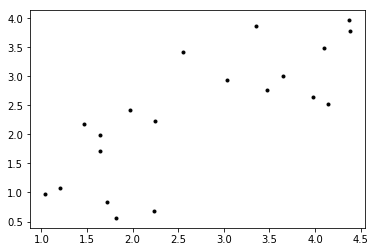

In [2]:
cluster1=np.random.uniform(0.5,2.5,(2,10))
cluster2=np.random.uniform(2.5,4.5,(2,10))
X=np.hstack((cluster1,cluster2)).T
plt.plot(X[:,0],X[:,1],'k.')
plt.show()

In [3]:
Agg = AgglomerativeClustering(n_clusters=3)
Agg_cluster = Agg.fit_predict(X)
Agg_cluster

array([2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

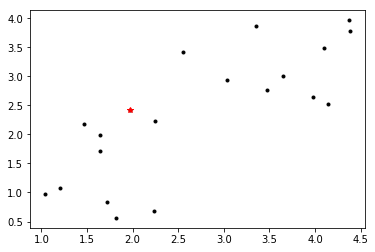

In [4]:
plt.plot(X[:,0],X[:,1],'k.')
plt.plot(X[0,0],X[0,1],'r*')
plt.show()

In [5]:
Agg_cluster[0]

2

In [6]:
colors = ['rd','gx','c+','y*','b^','m>']

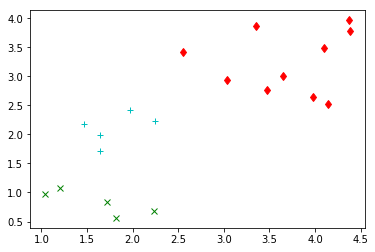

In [7]:
labels = Agg_cluster

for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[labels[i]])

plt.show()

In [8]:
Agg = AgglomerativeClustering(n_clusters=4)
Agg_cluster = Agg.fit_predict(X)
Agg_cluster

array([2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0],
      dtype=int64)

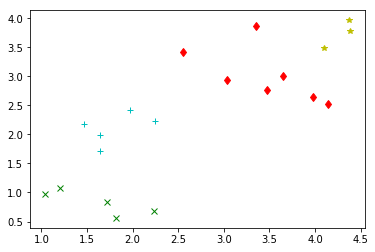

In [9]:
labels = Agg_cluster

for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[labels[i]])

plt.show()

In [10]:
#ward:將兩個簇合併時，考慮讓所有簇的variance增加最少
#average:將簇裡所有樣本之間的平均距離最小的兩個簇合併
#complete:將簇裡所有樣本之間的平均距離最大的兩個簇合併
Agg_ward = AgglomerativeClustering(n_clusters=4,linkage='ward')
Agg_average = AgglomerativeClustering(n_clusters=4,linkage='average')
Agg_complete = AgglomerativeClustering(n_clusters=4,linkage='complete')
Agg_ward_cluster = Agg_ward.fit_predict(X)
Agg_average_cluster = Agg_average.fit_predict(X)
Agg_complete_cluster = Agg_complete.fit_predict(X)

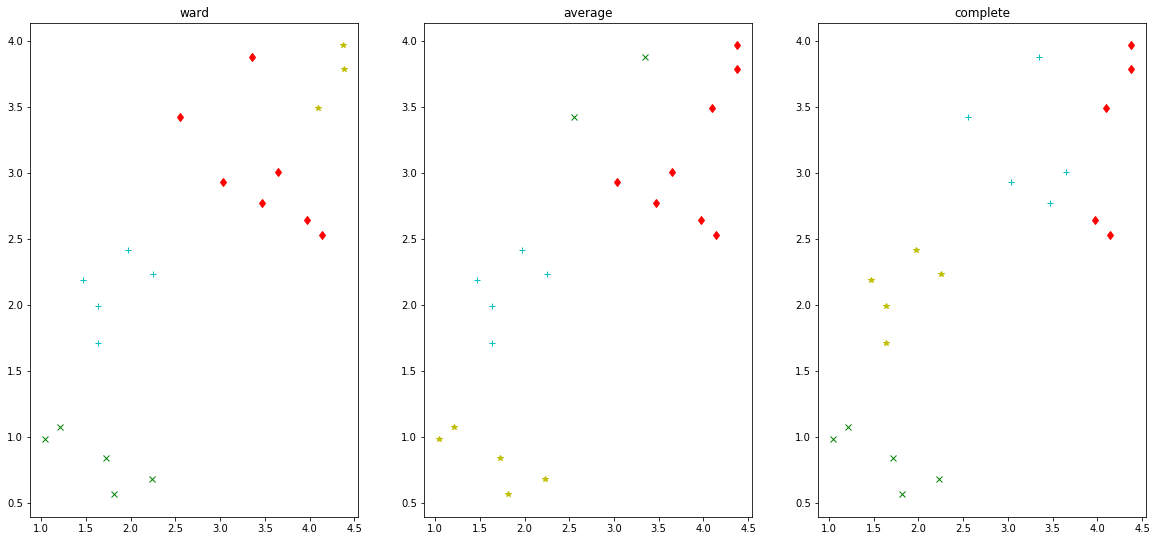

In [11]:
plt.figure(figsize=(20,20))

labels = Agg_ward_cluster
plt.subplot(231)
plt.title('ward')
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[labels[i]])

labels = Agg_average_cluster
plt.subplot(232)
plt.title('average')
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[labels[i]])
    
labels = Agg_complete_cluster
plt.subplot(233)
plt.title('complete')
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[labels[i]])
    
plt.show()

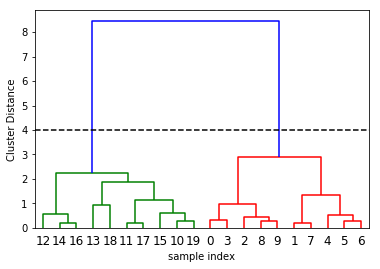

In [12]:
from scipy.cluster.hierarchy import dendrogram,ward
linkage_array=ward(X)
dendrogram(linkage_array)
ax=plt.gca()
bounds=ax.get_xbound()
#ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds,[4,4],'--',c='k')

plt.xlabel('sample index')
plt.ylabel('Cluster Distance')
plt.show()
